In [1]:
import os
import sys

os.environ["PYSPARK_PYTHON"]="C:\Spark\spark-3.3.2-bin-hadoop2\python"
os.environ["JAVA_HOME"] = "C:\Program Files\Java\jdk-18.0.2.1"
os.environ["SPARK_HOME"] = "C:\Spark\spark-3.3.2-bin-hadoop2"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
sys.path.insert(0, os.environ["PYLIB"] + "/py4j-0.10.9.5-src.zip")
sys.path.insert(0, os.environ["PYLIB"] + "/pyspark.zip")

MAX_MEMORY = "14G"
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("bicluster_predict") \
    .config("spark.driver.memory", MAX_MEMORY) \
    .getOrCreate()    
spark

In [2]:
import random
import numpy as np

# Set seed value for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [4]:
model_data = spark.read.option("header","true").option("inferSchema","true").csv("../data/EDA/final_data_for_modelling.csv")
model_data = model_data.drop("_c0")
model_data.printSchema()
model_data.count()

root
 |-- age_imputed: double (nullable = true)
 |-- bg2_lactate_imputed: double (nullable = true)
 |-- basophils_imputed: double (nullable = true)
 |-- eosinophils_imputed: double (nullable = true)
 |-- lymphocytes_imputed: double (nullable = true)
 |-- monocytes_imputed: double (nullable = true)
 |-- neutrophils_imputed: double (nullable = true)
 |-- albumin_imputed: double (nullable = true)
 |-- aniongap_imputed: double (nullable = true)
 |-- bicarbonate_imputed: double (nullable = true)
 |-- bun_imputed: double (nullable = true)
 |-- calcium_imputed: double (nullable = true)
 |-- chloride_imputed: double (nullable = true)
 |-- creatinine_imputed: double (nullable = true)
 |-- glucose_imputed: double (nullable = true)
 |-- sodium_imputed: double (nullable = true)
 |-- potassium_imputed: double (nullable = true)
 |-- inr_imputed: double (nullable = true)
 |-- pt_imputed: double (nullable = true)
 |-- ptt_imputed: double (nullable = true)
 |-- hematocrit_imputed: double (nullable = tr

63887

In [5]:
model_data.describe().toPandas()

,summary,age_imputed,bg2_lactate_imputed,basophils_imputed,eosinophils_imputed,lymphocytes_imputed,monocytes_imputed,neutrophils_imputed,albumin_imputed,aniongap_imputed,bicarbonate_imputed,bun_imputed,calcium_imputed,chloride_imputed,creatinine_imputed,glucose_imputed,sodium_imputed,potassium_imputed,inr_imputed,pt_imputed,ptt_imputed,hematocrit_imputed,hemoglobin_imputed,mch_imputed,mchc_imputed,mcv_imputed,platelet_imputed,rbc_imputed,rdw_imputed,wbc_imputed,scr_min_imputed,ckd_imputed,mdrd_est_imputed,scr_baseline_imputed,alt_imputed,alp_imputed,ast_imputed,bilirubin_total_imputed,charlson_comorbidity_index_imputed,gender
0,count,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887
1,mean,56.82400472709635,1.6618992909350772,0.41085979933311007,1.4472944417484328,20.265802119371077,6.036700737237932,72.54882370435301,3.87397749150817,14.322600842111854,26.913957456133485,15.669588492181507,8.975599104669197,104.77735689576909,0.8803982030773086,123.04590918340195,140.30140717203813,4.2118255670167315,1.131154381955504,12.685094463662445,29.783426988275597,37.57769029693053,12.582841579664079,30.44813811886616,33.90112385931408,90.68909793854776,245.37486499600857,4.175787405888535,13.6252257892843,9.807813170128496,0.8803982030773086,0.0,0.9607652574076508,0.8558993222408364,22.720741308873478,73.12986992658914,25.52693036141938,0.5236746129885502,2.7256405841564013,None
2,stddev,19.28094185711831,0.4508023009295065,0.1788947775643359,0.9596238678234628,7.209200043293772,1.8055899982717172,8.391445135120653,0.31142223482013737,2.620848637811744,2.84769779209311,6.63918448886357,0.4988295388939287,3.5586840240888145,0.23859787593365506,34.05988039237201,2.7373925256555154,0.4172687362614883,0.12710702741208696,1.3522042469266147,4.2842548656152895,4.668777216754638,1.6635514293713345,1.8779988531436738,1.2828829790201643,5.106900334736286,74.09647661291679,0.5615584317045133,1.1028047370996332,3.8156606614514987,0.23859787593365506,0.0,0.14264437270439084,0.17272703592571725,12.467065052034977,18.182226517428045,12.022792049492006,0.20858909294652203,2.5325512184663515,None
3,min,18.0,0.2,0.0,0.0,0.0,0.0,35.8,1.8,7.0,19.0,1.0,7.4,93.0,0.2,31.0,133.0,3.0,0.8,8.5,17.3,22.7,7.3,25.1,30.1,75.0,17.0,2.4,10.6,0.9,0.2,0.0,0.76,0.4,1.0,6.0,2.0,0.1,0.0,F
4,max,98.51,4.8,1.2,6.5,50.8,14.6,100.0,5.3,23.0,35.0,44.0,10.6,117.0,1.9,250.0,149.0,5.7,1.8,21.0,57.4,51.0,17.2,35.8,37.6,107.0,484.0,5.79,18.1,22.9,1.9,0.0,1.32,1.32,111.0,203.0,127.0,1.9,13.0,M


In [6]:
import pyspark.sql.functions as F
model_data = model_data.withColumn("gender_imputed", F.when(F.col("gender") == 'M', 1) \
                           .when(F.col("gender") == 'F', 2) \
                           .otherwise(0))
model_data.groupby("gender_imputed").count().toPandas()

,gender_imputed,count
0,1,29404
1,2,34483


In [7]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score

In [8]:
# data transfo
feature_cols =  model_data.columns
feature_cols.remove("charlson_comorbidity_index_imputed")
feature_cols.remove("gender")
#feature_cols.append("gender_imputed")
print(feature_cols)


['age_imputed', 'bg2_lactate_imputed', 'basophils_imputed', 'eosinophils_imputed', 'lymphocytes_imputed', 'monocytes_imputed', 'neutrophils_imputed', 'albumin_imputed', 'aniongap_imputed', 'bicarbonate_imputed', 'bun_imputed', 'calcium_imputed', 'chloride_imputed', 'creatinine_imputed', 'glucose_imputed', 'sodium_imputed', 'potassium_imputed', 'inr_imputed', 'pt_imputed', 'ptt_imputed', 'hematocrit_imputed', 'hemoglobin_imputed', 'mch_imputed', 'mchc_imputed', 'mcv_imputed', 'platelet_imputed', 'rbc_imputed', 'rdw_imputed', 'wbc_imputed', 'scr_min_imputed', 'ckd_imputed', 'mdrd_est_imputed', 'scr_baseline_imputed', 'alt_imputed', 'alp_imputed', 'ast_imputed', 'bilirubin_total_imputed', 'gender_imputed']


In [9]:
X = model_data.select([c for c in feature_cols]).toPandas()
y = model_data.select("charlson_comorbidity_index_imputed").toPandas()

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
to_scale = [col for col in feature_cols]
print(to_scale)


['age_imputed', 'bg2_lactate_imputed', 'basophils_imputed', 'eosinophils_imputed', 'lymphocytes_imputed', 'monocytes_imputed', 'neutrophils_imputed', 'albumin_imputed', 'aniongap_imputed', 'bicarbonate_imputed', 'bun_imputed', 'calcium_imputed', 'chloride_imputed', 'creatinine_imputed', 'glucose_imputed', 'sodium_imputed', 'potassium_imputed', 'inr_imputed', 'pt_imputed', 'ptt_imputed', 'hematocrit_imputed', 'hemoglobin_imputed', 'mch_imputed', 'mchc_imputed', 'mcv_imputed', 'platelet_imputed', 'rbc_imputed', 'rdw_imputed', 'wbc_imputed', 'scr_min_imputed', 'ckd_imputed', 'mdrd_est_imputed', 'scr_baseline_imputed', 'alt_imputed', 'alp_imputed', 'ast_imputed', 'bilirubin_total_imputed', 'gender_imputed']


In [11]:
scaler.fit(X)
print(X)
X = pd.DataFrame(scaler.transform(X))
print(X)

       age_imputed  bg2_lactate_imputed  basophils_imputed  \
0            59.30                  1.6                0.4   
1            45.50                  1.6                0.6   
2            66.45                  1.1                0.1   
3            32.32                  1.6                0.4   
4            84.21                  4.3                0.4   
...            ...                  ...                ...   
63882        32.61                  1.6                0.7   
63883        70.28                  1.6                0.4   
63884        75.02                  1.7                0.0   
63885        52.18                  1.6                0.4   
63886        67.54                  1.6                0.4   

       eosinophils_imputed  lymphocytes_imputed  monocytes_imputed  \
0                      1.3                 19.7                5.9   
1                      3.1                 29.6                4.0   
2                      0.8                  5

In [ ]:
X.isna().any()

In [12]:
X = X.replace(0, 0.001) # to fix the divide by 0 error in spectral biclustering

In [15]:
n_clusters_row = 2
n_clusters_column = 4
model_bi = SpectralBiclustering(n_clusters=(n_clusters_row, n_clusters_column), method="log", random_state=0)
model_bi.fit(X)
print(model_bi.row_labels_)
print(model_bi.column_labels_)

[1 0 0 ... 0 1 0]
[3 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 2 2 3 0 3 0 2 0 0 0 0 2 0 0 0 0 0
 1]


In [16]:
print(len(model_bi.row_labels_))

63887


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y_train_res =  []
y_train_res_predict =  []
y_test_res =  []
y_test_res_predict =  []
for i in range(n_clusters_row):
    cluster_rows = X[model_bi.row_labels_ == i]
    max_score = -2
    y_train = []
    y_train_p = []
    y_test = []
    y_test_p = []
    for j in range(n_clusters_column):
        print(i, j)
        rows_t = cluster_rows.T[model_bi.column_labels_ == j]
        X_c = rows_t.T
        #print(X_c)
        y_tr_t = y[model_bi.row_labels_ == i]
        #print(y_tr_t)
        y_c = y_tr_t.charlson_comorbidity_index_imputed.values #   [:, 1]
        #print(y_c)
        X_tr, X_t, y_tr, y_t = train_test_split(X_c, y_c, test_size=0.30, random_state=42)
        regr = LinearRegression()
        model = regr.fit(X_tr, y_tr)
        #print(X_tr)
        y_train_predict = model.predict(X_tr)
        y_test_predict = model.predict(X_t)
        sc = regr.score(X_t, y_t)
        if (sc > max_score):
            max_score = sc
            y_train = y_tr
            y_train_p = y_train_predict
            y_test = y_t
            y_test_p = y_test_predict
    y_train_res.extend(y_train)
    y_train_res_predict.extend(y_train_p)
    y_test_res.extend(y_test)
    y_test_res_predict.extend(y_test_p)
    print(max_score)

0 0
0 1
0 2
0 3
0.563228959063399
1 0
1 1
1 2
1 3
0.5152049850812512


In [18]:
print(len(y_train_res))
print(len(y_train_res_predict))
print(len(y_test_res))
print(len(y_test_res_predict))

44720
44720
19167
19167


In [19]:
44719 + 19168

63887

In [20]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_train_res, y_train_res_predict), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_train_res, y_train_res_predict), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_train_res, y_train_res_predict), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_train_res, y_train_res_predict), 2)) 
print("R2 score =", round(sm.r2_score(y_train_res, y_train_res_predict), 2))

Mean absolute error = 1.21
Mean squared error = 2.87
Median absolute error = 0.95
Explain variance score = 0.55
R2 score = 0.55


In [21]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test_res, y_test_res_predict), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test_res, y_test_res_predict), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test_res, y_test_res_predict), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test_res, y_test_res_predict), 2)) 
print("R2 score =", round(sm.r2_score(y_test_res, y_test_res_predict), 2))

Mean absolute error = 1.22
Mean squared error = 2.95
Median absolute error = 0.95
Explain variance score = 0.54
R2 score = 0.54


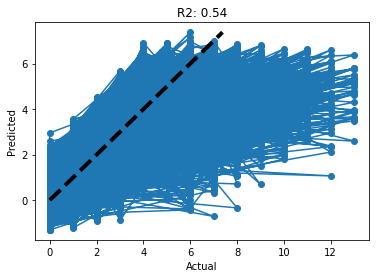

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

fig, ax = plt.subplots()
ax.scatter(y_test_res, y_test_res_predict)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

#y_test.reshape
y_test_1, y_test_pred_1 = pd.DataFrame(y_test_res).values.reshape(-1,1), pd.DataFrame(y_test_res_predict).values.reshape(-1,1)
ax.plot(y_test_1, y_test_pred_1)


ax.plot([min(y_test_res), max(y_test_res_predict)], [min(y_test_res), max(y_test_res_predict)], 'k--', lw=4)

ax.set_title('R2: ' + str(round(sm.r2_score(y_test_res, y_test_res_predict), 2)))
plt.show()

In [23]:
## average

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y_train_res =  []
y_train_res_predict =  []
y_test_res =  []
y_test_res_predict =  []
for i in range(n_clusters_row):
    cluster_rows = X[model_bi.row_labels_ == i]
    #max_score = -2
    y_train = []
    y_train_p = []
    y_test = []
    y_test_p = []
    for j in range(n_clusters_column):
        print(i, j)
        rows_t = cluster_rows.T[model_bi.column_labels_ == j]
        X_c = rows_t.T
        #print(X_c)
        y_tr_t = y[model_bi.row_labels_ == i]
        #print(y_tr_t)
        y_c = y_tr_t.charlson_comorbidity_index_imputed.values #   [:, 1]
        #print(y_c)
        X_tr, X_t, y_tr, y_t = train_test_split(X_c, y_c, test_size=0.30, random_state=42)
        regr = LinearRegression()
        model = regr.fit(X_tr, y_tr)
        #print(X_tr)
        y_train_predict = model.predict(X_tr)
        y_test_predict = model.predict(X_t)
        sc = regr.score(X_t, y_t)
        if j == 0:
            #max_score = sc
            y_train = y_tr
            y_train_p = y_train_predict
            y_test = y_t
            y_test_p = y_test_predict
        else:
            y_train = (y_train + y_tr)/2
            y_train_p = (y_train_p + y_train_predict)/2
            y_test = (y_test + y_t)/2
            y_test_p = (y_test_p + y_test_predict)/2
    y_train_res.extend(y_train)
    y_train_res_predict.extend(y_train_p)
    y_test_res.extend(y_test)
    y_test_res_predict.extend(y_test_p)
    #print(max_score)

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3


In [24]:
print(len(y_train_res))
print(len(y_train_res_predict))
print(len(y_test_res))
print(len(y_test_res_predict))

44720
44720
19167
19167


In [25]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_train_res, y_train_res_predict), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_train_res, y_train_res_predict), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_train_res, y_train_res_predict), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_train_res, y_train_res_predict), 2)) 
print("R2 score =", round(sm.r2_score(y_train_res, y_train_res_predict), 2))

Mean absolute error = 1.24
Mean squared error = 3.03
Median absolute error = 0.97
Explain variance score = 0.53
R2 score = 0.53


In [26]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test_res, y_test_res_predict), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test_res, y_test_res_predict), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test_res, y_test_res_predict), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test_res, y_test_res_predict), 2)) 
print("R2 score =", round(sm.r2_score(y_test_res, y_test_res_predict), 2))

Mean absolute error = 1.25
Mean squared error = 3.1
Median absolute error = 0.97
Explain variance score = 0.52
R2 score = 0.52


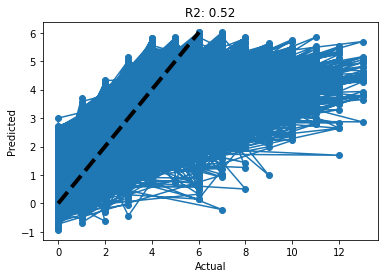

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

fig, ax = plt.subplots()
ax.scatter(y_test_res, y_test_res_predict)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

#y_test.reshape
y_test_1, y_test_pred_1 = pd.DataFrame(y_test_res).values.reshape(-1,1), pd.DataFrame(y_test_res_predict).values.reshape(-1,1)
ax.plot(y_test_1, y_test_pred_1)


ax.plot([min(y_test_res), max(y_test_res_predict)], [min(y_test_res), max(y_test_res_predict)], 'k--', lw=4)

ax.set_title('R2: ' + str(round(sm.r2_score(y_test_res, y_test_res_predict), 2)))
plt.show()